* Extract Information
    * need integer of floating point features so we can multiply it with a coefficient
* Combine Information
    * interaction terms
* Transfrom Information
    * string data: Country names to Integer con: implies ordering (spice level is a good example)
    * One hot encoding, new feature with 0/1 con: lots of new features

In [1]:
# Dealing with outliers
    # often better to remove them
    # define what is an outlier: range and limits, percentage of data
    # very domain dependent
    # also effects your models usecases

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):
    np.random.seed(seed)
    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    return sample_ages

In [10]:
sample=create_ages()

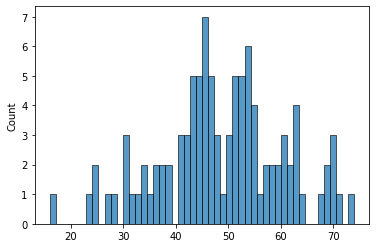

In [11]:
sns.histplot(sample,bins=50)

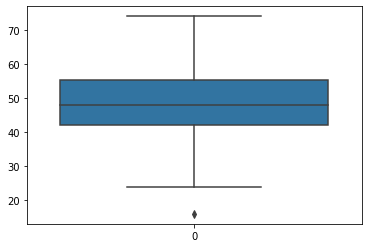

In [12]:
sns.boxplot(data=sample)

In [13]:
ser=pd.Series(sample)

In [14]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [16]:
q75,q25 = np.percentile(sample,[75,25])

In [17]:
iqr=q75-q25

In [18]:
lower_limit = q25-1.5*iqr

In [20]:
df = pd.read_csv("C:\\Users\\hehexd\\Desktop\\Drive\\Untitled Folder\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\\Ames_Housing_Data.csv")

In [25]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

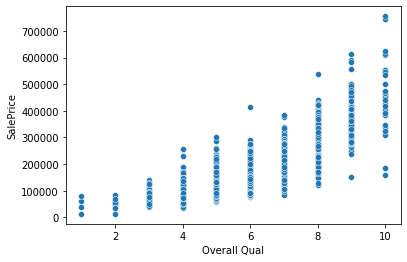

In [27]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

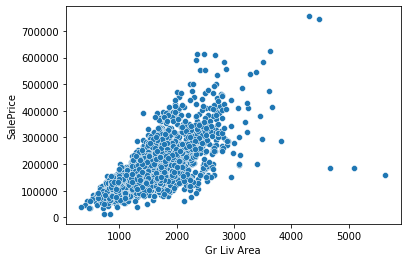

In [28]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [29]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [32]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [34]:
df = df.drop(drop_ind,axis=0)

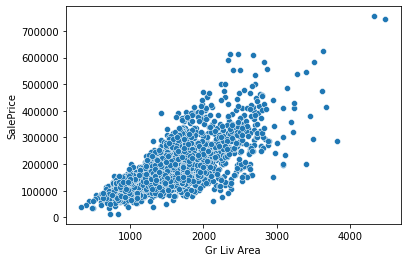

In [35]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [38]:
# Dealing with missing data
with open("C:\\Users\\hehexd\\Desktop\\Drive\\Untitled Folder\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\\Ames_Housing_Feature_Description.txt","r") as f:
    print(f.read)

<built-in method read of _io.TextIOWrapper object at 0x00000225E4742668>


In [41]:
df = pd.read_csv("C:\\Users\\hehexd\\Desktop\\Drive\\Untitled Folder\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\\Ames_outliers_removed.csv")

In [46]:
df=df.drop("PID",axis=1)

In [48]:
df.isnull().sum() > 0

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 80, dtype: bool

In [51]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [54]:
percent_nan = percent_missing(df)

(0, 1)

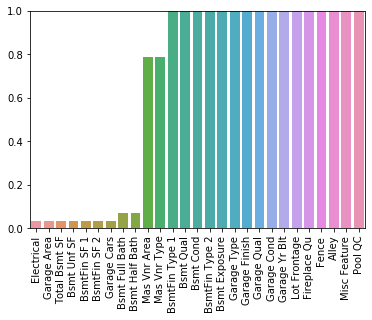

In [57]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [58]:
# Removing features vs removing rows
# drop row when missing is below 1%
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [60]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [61]:
df=df.dropna(axis=0,subset=['Electrical',"Garage Cars"])

In [62]:
# BSMT NUMERIC COLUMNS --> fillna 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# BSMNT STRING COLUMNS
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [64]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
# Drop Feature columns
    # simple to do
    # might be an important signal
# Filling in missing data
    # Potentially changing ground truth in data

# Categorical data

In [67]:
df = pd.read_csv("C:\\Users\\hehexd\\Desktop\\Drive\\Untitled Folder\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\\Ames_NO_Missing_Data.csv")

In [68]:
with open('C:\\Users\\hehexd\\Desktop\\Drive\\Untitled Folder\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\\Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [69]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [71]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [72]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [76]:
my_object_df=df.select_dtypes(include='object')
my_numeric_df=df.select_dtypes(exclude='object')

In [82]:
my_objects_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [83]:
final_df = pd.concat([my_numeric_df,my_objects_dummies],axis=1)

In [85]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0
